# Лабораторная работа 2

## Выполнил студент группы 6133-010402D Читоркин Егор Евгеньевич

Датасет - данные о квартирах в городе Москва (https://www.kaggle.com/datasets/egorkainov/moscow-housing-price-dataset)

In [1]:
import pandas as pd

##### Задание 1

Считать в pandas.DataFrame любой источник данных

In [2]:
data = pd.read_csv('data.csv')

##### Задание 2

Привести описание датасета

|Название признака|Значение признака|Единица измерения|
|-----------------|-----------------|-----------------|
|Price|Цена|Рубли|
|Apartment type|Тип|Первичное/вторичное|
|Metro station|Ближайшая станция метро|-|
|Minutes to metro|Время до ближайшей станции|Минуты|
|Region|Область|-|
|Number of rooms|Количество комнат|-|
|Area|Площадь|кв. м|
|Living area|Жилая площадь|кв. м|
|Kitchen area|Площадь кухни|кв. м|
|Floor|Этаж|-|
|Number of floors|Количество этажей в доме|-|
|Renovation|Внутренная отделка|-|

Задание 3. `matplotlib`:  
   - Построить несколько графиков разного вида с использованием `matplotlib`.  
   - Построить несколько суб-графиков на одном графике используя `.subplot`.  
   - Построить интерактивный график со слайдером.
   
   > - Графики должны быть разных видов.  
   > - Хотя бы в одном графике необходимо подписать оси.  
   > - Во всех графиках необходимо указать название.
   > - Необязательно строить сложный и перегруженный информацией интерактивный график, достаточно одного-двух числовых признаков в разрезе другого признака, как минимум добавить слайдер (ползунок). Наличие других графических элементов управления (кнопки и т.п.) - опционально.

In [3]:
from matplotlib import pyplot as plt

- несколько графиков разного вида

Построим Гистограмму распределения средней стоимость жилья в зависимости от типа внутренней отделки

([0, 1, 2, 3],
 [Text(0, 0, 'Cosmetic'),
  Text(1, 0, 'Designer'),
  Text(2, 0, 'European-style renovation'),
  Text(3, 0, 'Without renovation')])

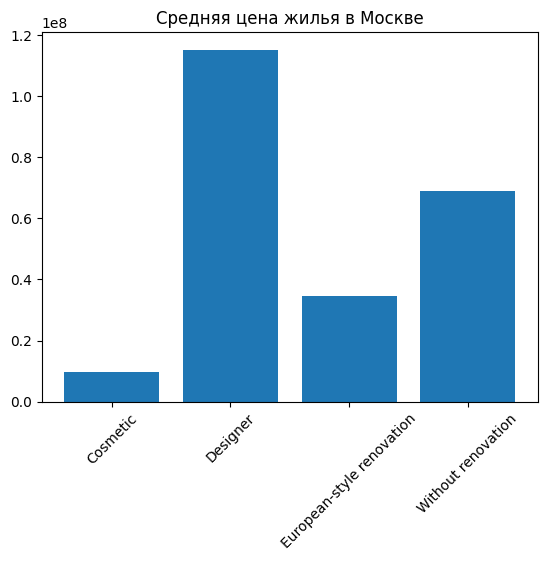

In [4]:
bar_data = data.groupby('Renovation', as_index=False).agg({'Price': 'mean'})
plt.bar(x=bar_data['Renovation'], height=bar_data['Price'])
plt.title('Средняя цена жилья в Москве')
plt.xticks(rotation=45)

Построим диаграмму рассеивания между стоимостью жилья и жилой площадью

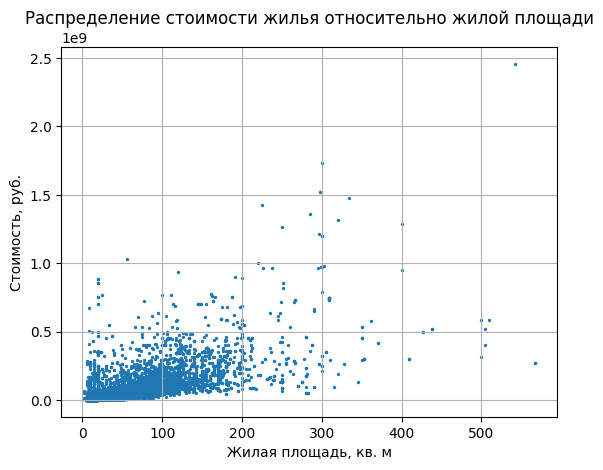

In [5]:
plt.scatter(x=data['Living area'], y=data['Price'], s=2)
plt.title('Распределение стоимости жилья относительно жилой площади')
plt.xlabel('Жилая площадь, кв. м')
plt.ylabel('Стоимость, руб.')
plt.grid()

Построим график зависимости минимальной стоимости жилья от времени до ближайшей станции метро

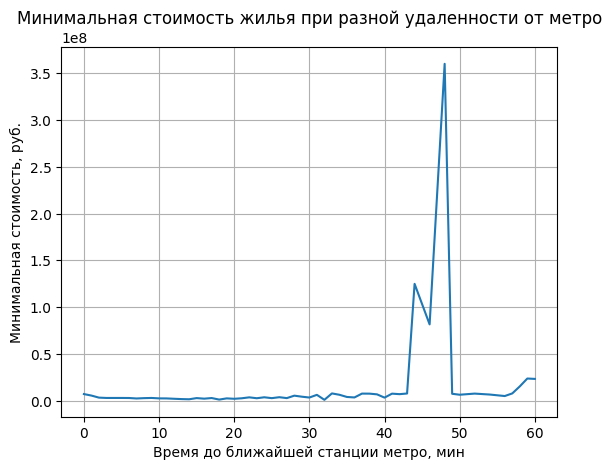

In [6]:
plot_data = data.groupby('Minutes to metro', as_index=False).agg({'Price': 'min'})
plt.plot(plot_data['Minutes to metro'], plot_data['Price'])
plt.title('Минимальная стоимость жилья при разной удаленности от метро')
plt.xlabel('Время до ближайшей станции метро, мин')
plt.ylabel('Минимальная стоимость, руб.')
plt.grid()

- несколько суб-графиков на одном графике используя `.subplot`

Построим серию графиков минимальной стоимости жилья от времени до ближайшей станции метро в разрезе внутренней отделки

In [7]:
multyplot_data = data.groupby(['Renovation', 'Minutes to metro'], as_index=False).agg({'Price': 'min'})
multyplot_data

,Renovation,Minutes to metro,Price
0,Cosmetic,1.0,5700000.0
1,Cosmetic,2.0,3500000.0
2,Cosmetic,3.0,3150000.0
3,Cosmetic,4.0,3150000.0
4,Cosmetic,5.0,3150000.0
...,...,...,...
180,Without renovation,56.0,5200000.0
181,Without renovation,57.0,8200000.0
182,Without renovation,58.0,23500000.0
183,Without renovation,59.0,23900000.0


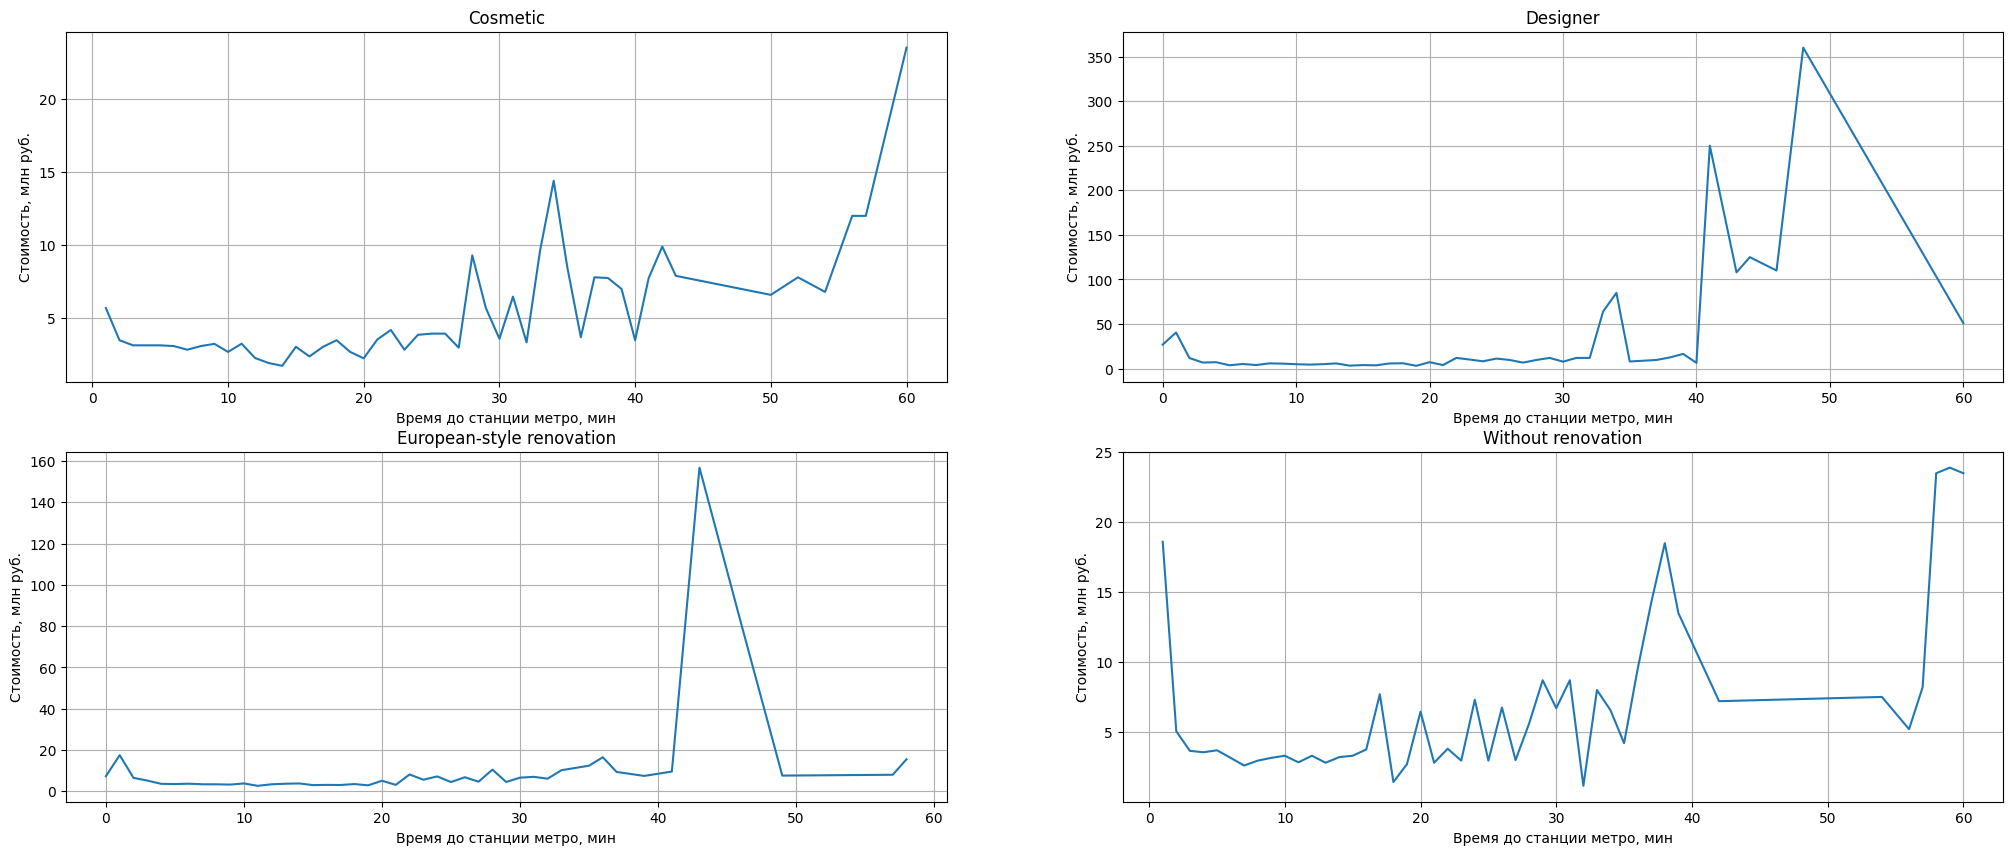

In [8]:
plt.figure(figsize=(25, 10))

types = multyplot_data['Renovation'].unique()

for i in range(types.shape[0]):
    sp1 = plt.subplot(2, 2, i+1)
    subdf = multyplot_data[multyplot_data['Renovation'] == types[i]]
    plt.plot(subdf['Minutes to metro'], subdf['Price'] / 1e6)
    sp1.set_title(types[i])
    sp1.set_xlabel('Время до станции метро, мин')
    sp1.set_ylabel('Стоимость, млн руб.')
    sp1.grid()

- Построить интерактивный график со слайдером.

Создадим следующий интерактивный график: пусть по оси X будет жилая площадь, по оси Y - средняя стоимость жилья, а сами графики будут для каждого типа отделки

In [41]:
showdf = data.groupby(['Renovation', 'Living area'])['Price'].mean().reset_index()
showdf.columns = ['Renovation', 'Living area', 'Mean price']
showdf

,Renovation,Living area,Mean price
0,Cosmetic,5.0,8500000.0
1,Cosmetic,5.2,6500000.0
2,Cosmetic,5.7,9200000.0
3,Cosmetic,6.0,11930000.0
4,Cosmetic,6.4,2800000.0
...,...,...,...
3119,Without renovation,409.8,300000000.0
3120,Without renovation,426.8,500000000.0
3121,Without renovation,504.4,520000000.0
3122,Without renovation,504.9,400000000.0


0

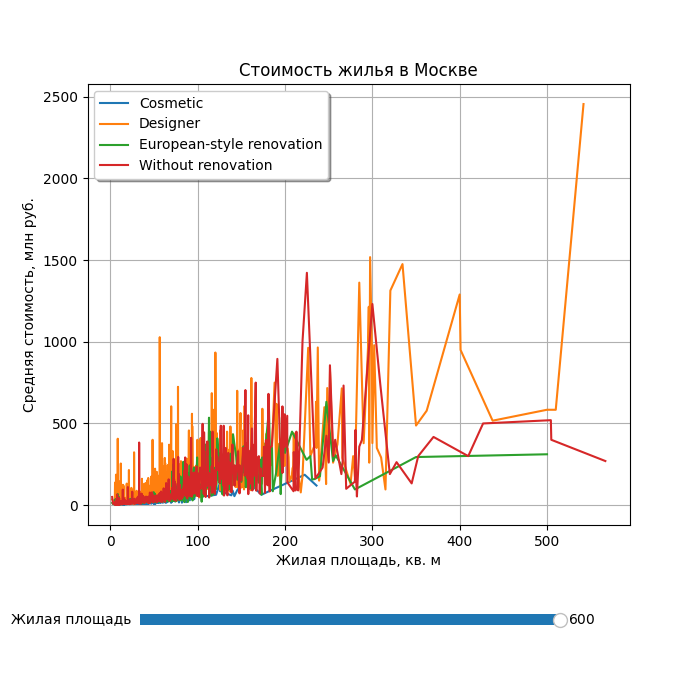

In [42]:
%matplotlib inline
%matplotlib widget

from matplotlib.widgets import Slider

types = showdf['Renovation'].unique()

f, ax = plt.subplots(figsize=(7, 7))

for i in range(types.shape[0]):
    subdf = showdf[showdf['Renovation'] == types[i]]
    ax.plot(subdf['Living area'], subdf['Mean price'] / 1e6, label=types[i])

plt.title('Стоимость жилья в Москве')
plt.xlabel('Жилая площадь, кв. м')
plt.ylabel('Средняя стоимость, млн руб.')
plt.grid()

leg = ax.legend(loc ='upper left', fancybox=True, shadow=True)

f.subplots_adjust(bottom=0.25)

ax_area = f.add_axes([0.20, 0.1, 0.60, 0.03])
area_slider = Slider(
    ax=ax_area,
    label='Жилая площадь',
    valmin=0,
    valmax=600,
    valinit=600,
    valstep = 1,
)

lines = ax.get_lines()
lined = {}
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(7)
    lined[legline] = origline

def update(val):
    ax.clear()
    area = area_slider.val
    for i in range(types.shape[0]):
        subdf = showdf[(showdf['Renovation'] == types[i]) & (showdf['Living area'] <= area)]
        ax.plot(subdf['Living area'], subdf['Mean price'] / 1e6, label=types[i])
    leg = ax.legend(loc ='upper left', fancybox=True, shadow=True)
    ax.set_xlabel('Жилая площадь, кв. м')
    ax.set_ylabel('Средняя стоимость, млн руб.')
    ax.set_title('Стоимость жилья в Москве')
    ax.grid()

    lines = ax.get_lines()
    for legline, origline in zip(leg.get_lines(), lines):
        legline.set_picker(7)
        lined[legline] = origline

    f.canvas.draw_idle()

def on_pick(event):
    legline = event.artist
    origline = lined[legline]
    visible = not origline.get_visible()
    origline.set_visible(visible)
    legline.set_alpha(1.0 if visible else 0.2)
    f.canvas.draw()

f.canvas.mpl_connect('pick_event', on_pick)
area_slider.on_changed(update)

Задание 4. `pandas`:  
   - Построить три разных вида графиков с использованием `pandas.DataFrame.plot` / `Series.plot`.  
   
   > - Среди графиков должен присутствовать один `boxplot` (обязательно надо использовать параметр `by`, для исследования взаимосвязи числовой переменной и какой-либо другой).  
   > - Графики должны быть построены как через методы `DataFrame`, так и через методы `Series`. То есть оба варианта нужно продемонстрировать.

Построим Boxplot площади кухни для каждого типа отделки

<Axes: title={'center': 'Kitchen area'}, xlabel='Renovation'>

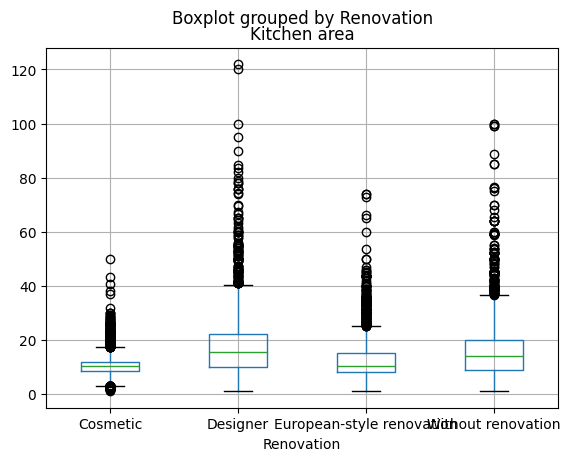

In [9]:
data.boxplot(by='Renovation', column='Kitchen area')

С помощью Series отрисуем общий boxplot для Kitchen area

<Axes: >

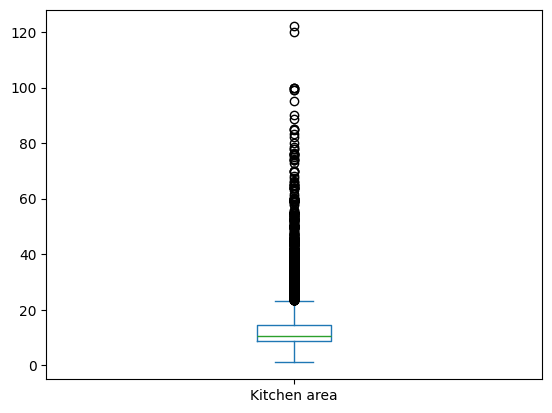

In [12]:
s = data['Kitchen area']
s.plot(kind='box')

Нарисуем гистограмму площади кухни для каждого типа отделки

array([[<Axes: title={'center': '(Cosmetic,)'}>,
        <Axes: title={'center': '(Designer,)'}>],
       [<Axes: title={'center': '(European-style renovation,)'}>,
        <Axes: title={'center': '(Without renovation,)'}>]], dtype=object)

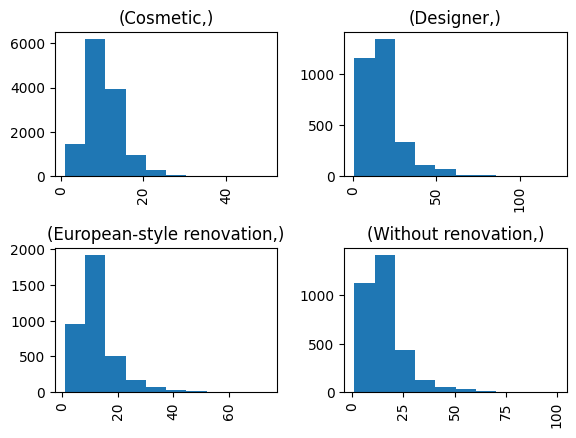

In [13]:
data.hist(column='Kitchen area', by=['Renovation'])

Через Series построим общую гистограмму площади кухни

<Axes: >

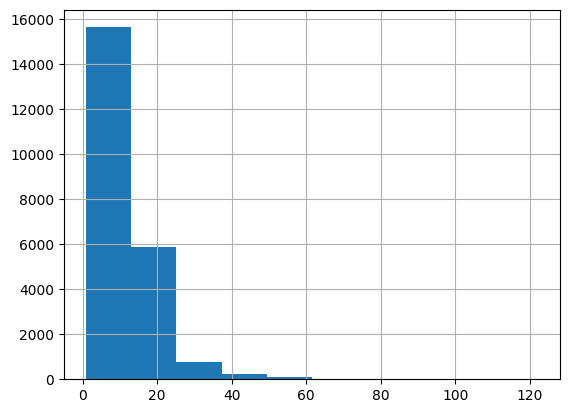

In [14]:
data['Kitchen area'].hist()

Построим круговую диаграмму распределения жилья по типу отделки

<Axes: ylabel='count'>

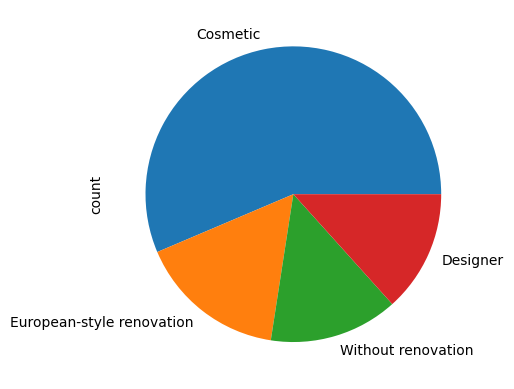

In [20]:
data['Renovation'].value_counts().plot(kind='pie')

Задание 5. `seaborn`:  
   - Построить `.pairplot` на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.  
   - Построить `.jointplot`, проанализировать взаимосвязь двух конкретных числовых признаков.  
   - Построить `.boxplot` и/или `.violinplot` на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.  
   - Построить график `.heatmap` попарной корреляции всех числовых признаков.  
   
     > Категориальные признаки необходимо убрать из датафрейма перед построением.  

In [21]:
import seaborn as sns

In [22]:
numeric_columns = ['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']
categorial_columns = ['Apartment type', 'Metro station', 'Region', 'Renovation']

- Построить `.pairplot` на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.  

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

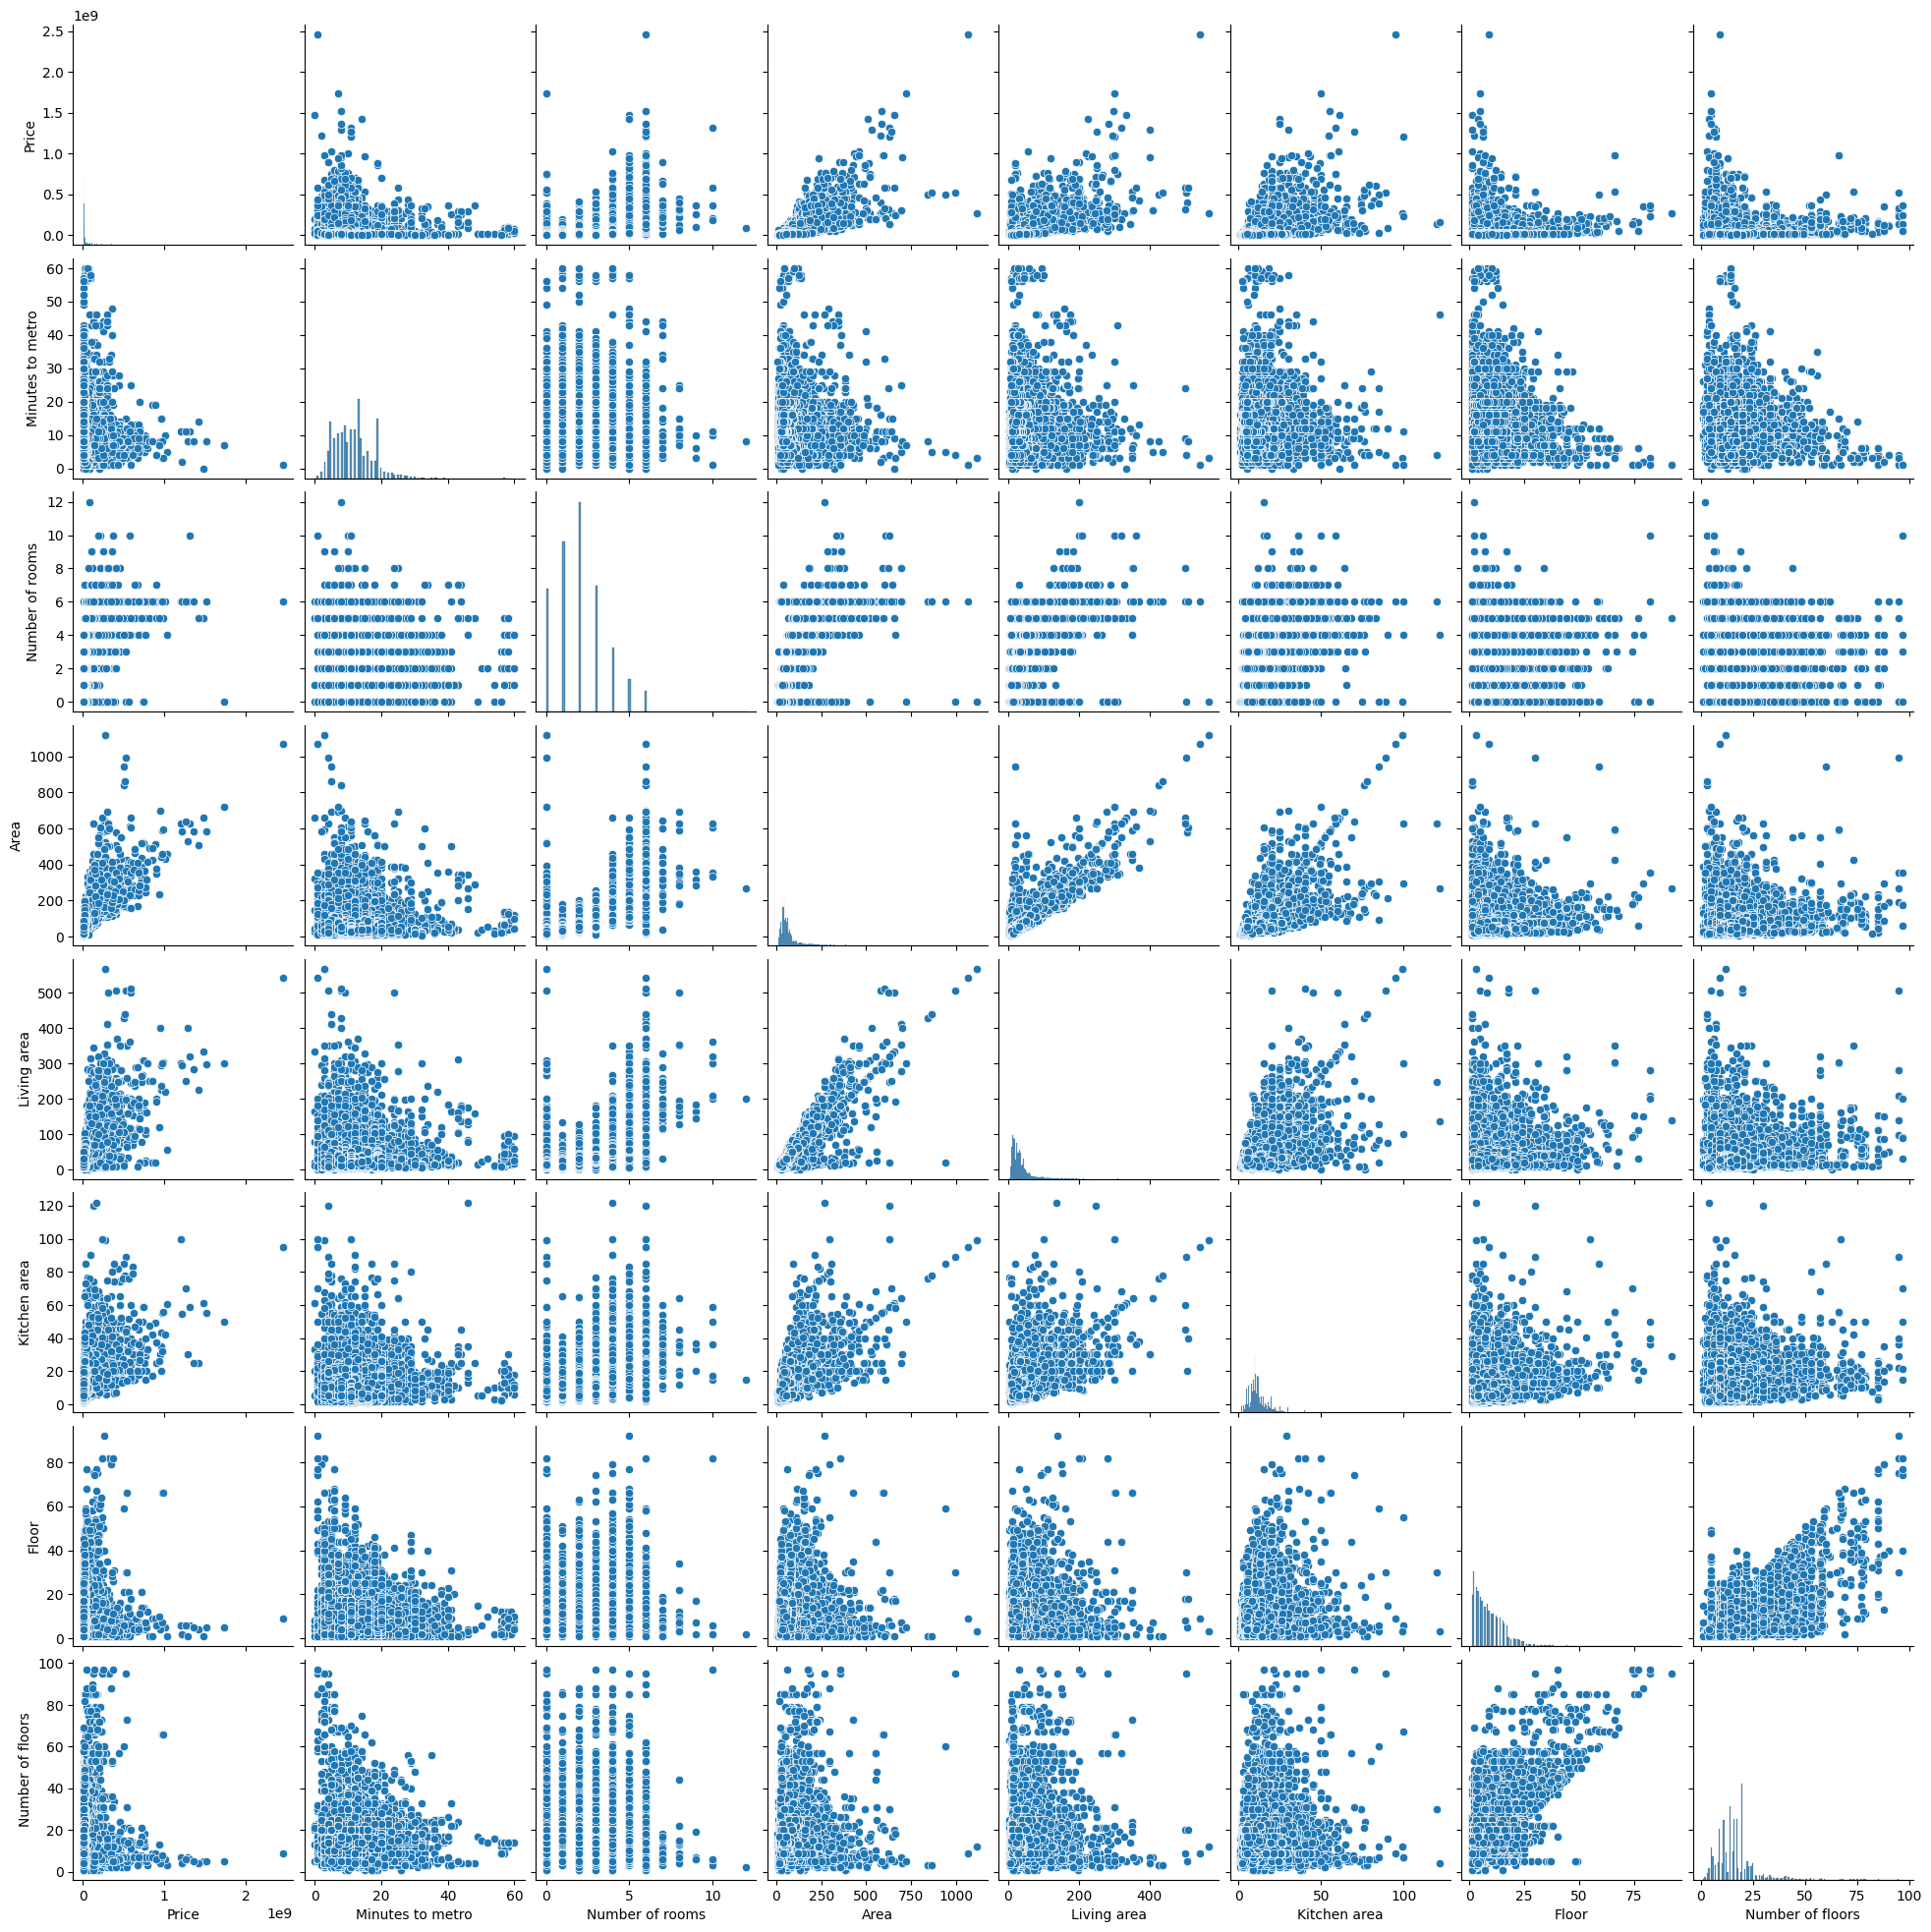

In [23]:
sns.pairplot(data[numeric_columns])

   - Построить `.jointplot`, проанализировать взаимосвязь двух конкретных числовых признаков. 

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


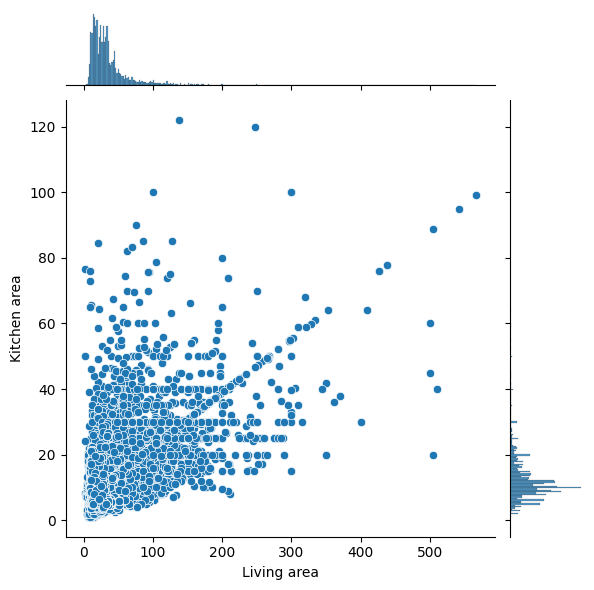

In [24]:
sns.jointplot(data=data, x='Living area', y='Kitchen area')

   - Построить `.boxplot` и/или `.violinplot` на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.  

<Axes: xlabel='Apartment type', ylabel='Area'>

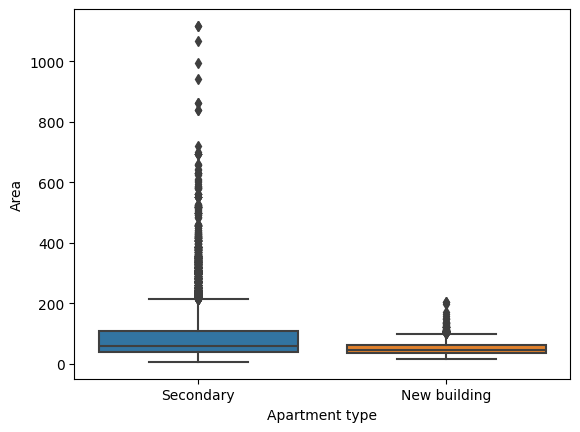

In [28]:
sns.boxplot(data=data, x='Apartment type', y='Area')

<Axes: xlabel='Apartment type', ylabel='Area'>

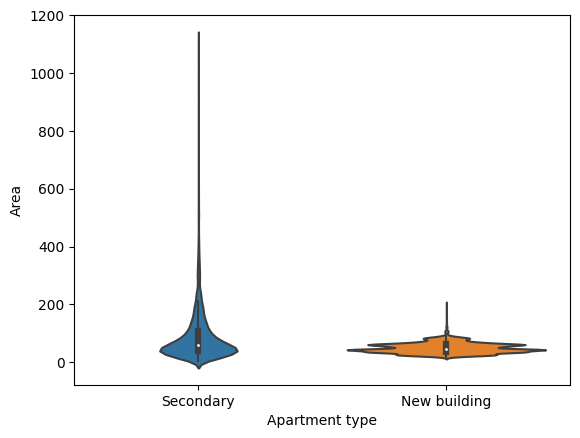

In [29]:
sns.violinplot(data=data, x='Apartment type', y='Area')

   - Построить график `.heatmap` попарной корреляции всех числовых признаков.

<Axes: >

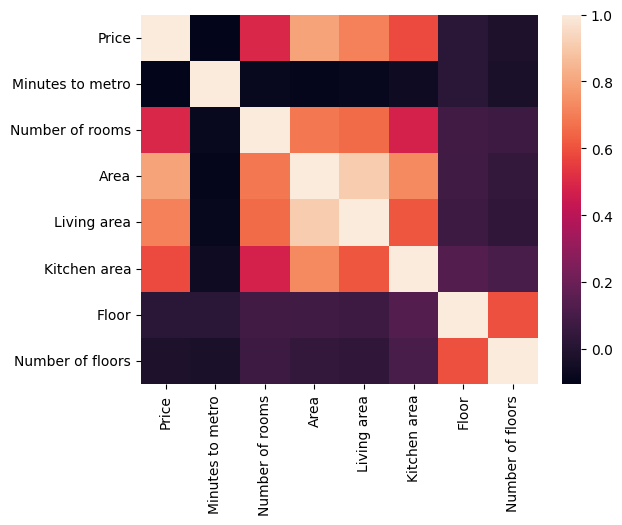

In [31]:
sns.heatmap(data=data[numeric_columns].corr())

Задание 6. `scipy.stats`:  
   - Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.  

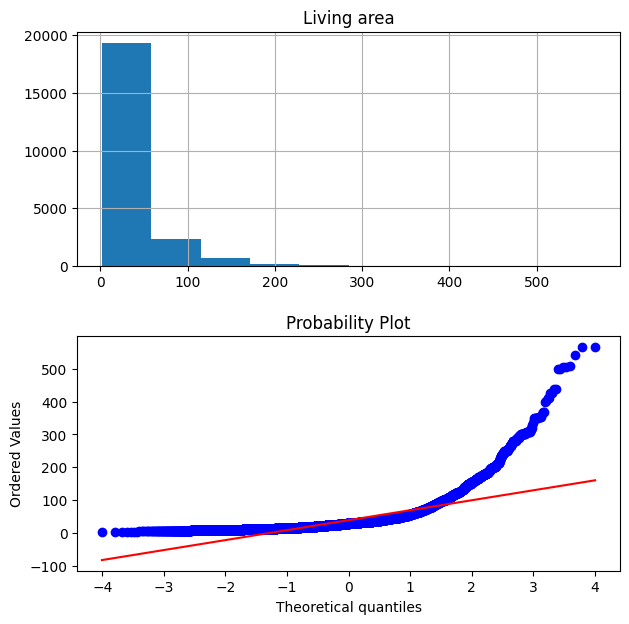

In [32]:
from scipy import stats

fig_p, ax_p = plt.subplots(2, 1, figsize=(7, 7))
stats.probplot(data['Living area'], dist="norm", plot=plt)
plt.subplot(2, 1, 2)
data.hist(ax=ax_p[0], column='Living area')
plt.show()

Задание 7. `plotly`:  
   - Построить несколько графиков разного вида.  
   - Построить несколько суб-графиков на одном графике.  
   - Построить интерактивный график.  
   
     > Использование `Dash` опционально.

In [33]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

Нарисуем те же графики, что и в задании с matplotlib

- несколько графиков разного вида

Построим Гистограмму распределения средней стоимость жилья в зависимости от типа внутренней отделки

In [35]:
bar_data = data.groupby('Renovation', as_index=False).agg({'Price': 'mean'})
fig = px.histogram(bar_data, x="Renovation", y='Price')
fig.show()

Построим диаграмму рассеивания между стоимостью жилья и жилой площадью

In [36]:
fig = px.scatter(data, 'Living area', 'Price')
fig.show()

Построим график зависимости минимальной стоимости жилья от времени до ближайшей станции метро

In [38]:
plot_data = data.groupby('Minutes to metro', as_index=False).agg({'Price': 'min'})
fig = px.line(plot_data, 'Minutes to metro', 'Price')
fig.show()

- несколько суб-графиков на одном графике используя `.subplot`

Построим серию графиков минимальной стоимости жилья от времени до ближайшей станции метро в разрезе внутренней отделки

In [39]:
multyplot_data = data.groupby(['Renovation', 'Minutes to metro'], as_index=False).agg({'Price': 'min'})

types = multyplot_data['Renovation'].unique()

fig = make_subplots(rows=2, cols=2, subplot_titles=types)

for i in range(2):
    for j in range(2):
        subdf = multyplot_data[multyplot_data['Renovation'] == types[2*i+j]]
        fig.add_trace(go.Line(x=subdf['Minutes to metro'], y=subdf['Price'] / 1e6), row=i+1, col=j+1)

fig.show()


c:\Python311\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




- Построить интерактивный график со слайдером.

Создадим следующий интерактивный график: пусть по оси X будет жилая площадь, по оси Y - средняя стоимость жилья, а сами графики будут для каждого типа отделки

In [43]:
showdf = data.groupby(['Renovation', 'Living area'])['Price'].mean().reset_index()
showdf.columns = ['Renovation', 'Living area', 'Mean price']

In [46]:
fig = go.Figure()

types = showdf['Renovation'].unique()

for i in range(types.shape[0]):
    subdf = showdf[showdf['Renovation'] == types[i]]
    fig.add_trace(go.Scatter(x=subdf['Living area'], y=subdf['Mean price'] / 1e6, name = types[i]))

fig.update_layout(
    title_text='Стоимость жилья в Москве',
    title_x=0.5,
    legend_title='Тип отделки',
    legend = dict(orientation = "v", y = .5, x = 1.025)
)

fig.update_layout(
    xaxis = dict(
        rangeslider = dict(
            visible = True
        ),
        type = 'linear'
    ),
    autosize=False,
    width=1300,
    height=800,
)

fig.show()